In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr


'''
Compare representative clusters in the Yanno.npz to the rest of the Y_full dataset to retrieve the AVA, RME, SMDV,SMDD clusters 
for each worm.
'''

'\nCompare representative clusters in the Yanno.npz to the rest of the Y_full dataset to retrieve the AVA, RME, SMDV,SMDD clusters \nfor each worm.\n'

In [2]:
stimulus = np.load('../ProcAiryData/inpfull_op50_SF.npz')

ON_cells = np.load('../ProcAiryData/Yop50_SF_psON.npz')
OFF_cells = np.load('../ProcAiryData/Yop50_SF_psOFF.npz')
Y_full = np.load('../ProcAiryData/Yfull_op50_SF.npz')

yanno = np.load('../ProcAiryData/Yanno_op50_SF.npz')

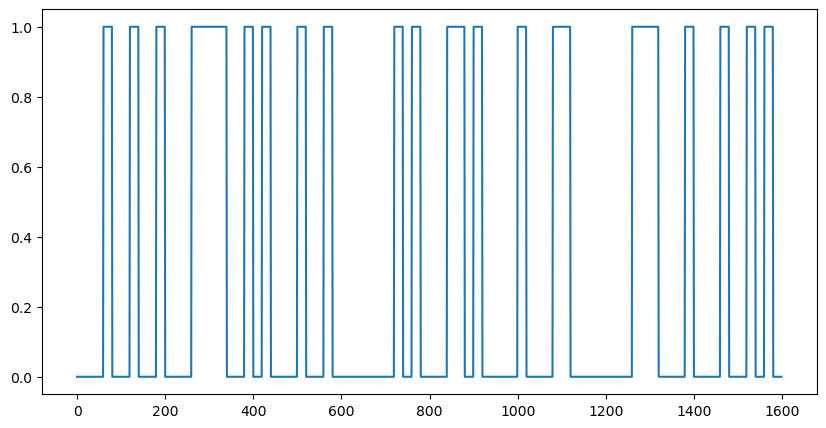

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(stimulus['arr_2'])

In [4]:
yanno_full = np.concatenate([yanno['arr_0'], yanno['arr_1'], yanno['arr_2'], yanno['arr_3'], yanno['arr_4'], yanno['arr_5'], yanno['arr_6']], axis = 1 )
yanno_full_df = pd.DataFrame(yanno_full.T)

In [5]:
#obtain the worm id data, and stimulus group data to Y_full, add these as columns, create a data frame
column = [0] * len(Y_full['arr_0'].T) + [1] * len(Y_full['arr_1'].T) + [2] * len(Y_full['arr_2'].T) + [3] * len(Y_full['arr_3'].T) + [4] * len(Y_full['arr_4'].T) + [5] * len(Y_full['arr_5'].T) + [6] * len(Y_full['arr_6'].T)
worm_id = np.array(column)
Y_full_concat = np.concatenate([Y_full['arr_0'],
                         Y_full['arr_1'],
                         Y_full['arr_2'],
                         Y_full['arr_3'] , Y_full['arr_4'], Y_full['arr_5'], Y_full['arr_6']], axis =1)

Y_full_df = pd.DataFrame(Y_full_concat)
Y_full_df = Y_full_df.T
Y_full_df['worm_id'] = worm_id
stim_g = [0] * len(Y_full['arr_0'].T) + [0] * len(Y_full['arr_1'].T) + [1] * len(Y_full['arr_2'].T) + [1] * len(Y_full['arr_3'].T) + [1] * len(Y_full['arr_4'].T) + [1] * len(Y_full['arr_5'].T) + [0] * len(Y_full['arr_6'].T)
stim_group = np.array(stim_g)
Y_full_df['stim_group'] = stim_group

In [6]:
Y_full_df

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010237,0.013933,0.005688,0.014389,0.012715,0.012774,0.006379,0.011325,0,0
1,0.976775,0.991876,0.959301,0.965111,1.000000,0.866721,0.973716,0.923286,0.930305,0.918496,...,0.472877,0.476172,0.437171,0.449895,0.442183,0.454118,0.467614,0.439026,0,0
2,1.000000,0.935644,0.849705,0.845024,0.842825,0.796130,0.830378,0.804948,0.761474,0.780609,...,0.330972,0.342765,0.340209,0.350782,0.289997,0.341319,0.324467,0.307941,0,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022308,0.021005,0.025381,0.005841,0.004750,0.016866,0.017452,0.028150,0,0
4,0.006261,0.006576,0.010239,0.005997,0.007404,0.024813,0.017438,0.033881,0.013081,0.004452,...,0.367689,0.421811,0.411161,0.503685,0.509207,0.513564,0.600296,0.730846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,0.300387,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,0.192825,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,0.635459,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,0.825304,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


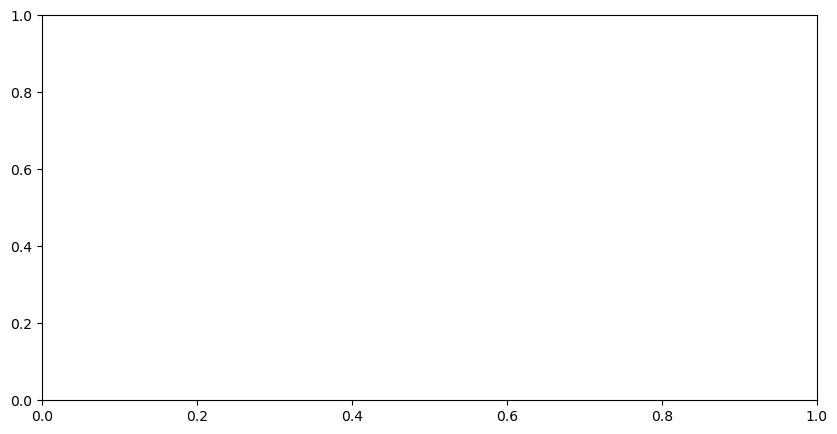

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

In [8]:
#use ON/OFF cells data to obtain a mask 
sensory_concat = np.concatenate([ON_cells['arr_0'], ON_cells['arr_1'], ON_cells['arr_2'], ON_cells['arr_3'], ON_cells['arr_4'], ON_cells['arr_5'], ON_cells['arr_6'],
                                  OFF_cells['arr_0'], OFF_cells['arr_1'], OFF_cells['arr_2'], OFF_cells['arr_3'], OFF_cells['arr_4'], OFF_cells['arr_5'], OFF_cells['arr_6']], axis = 1)

sensory_df = pd.DataFrame(sensory_concat)

# Merge the DataFrames on columns 'A' and 'B'
merged_df = pd.merge(Y_full_df.iloc[:, : -2], sensory_df.T, how='outer', indicator = True)
both = merged_df[merged_df['_merge'] == 'both']
#indexes of sensory neurons in the original dataframe
index_array = np.array(both.index)

In [9]:
ON_cells = pd.DataFrame(np.concatenate([ON_cells['arr_0'], ON_cells['arr_1'], ON_cells['arr_2'], ON_cells['arr_3'], ON_cells['arr_4'], ON_cells['arr_5'], ON_cells['arr_6']], axis =1))
OFF_cells = pd.DataFrame(np.concatenate([OFF_cells['arr_0'], OFF_cells['arr_1'], OFF_cells['arr_2'], OFF_cells['arr_3'], OFF_cells['arr_4'], OFF_cells['arr_5'], OFF_cells['arr_6']], axis = 1))

In [10]:
ON_cells = ON_cells.T
OFF_cells = OFF_cells.T

In [12]:
ON_ids = np.array(ON_cells.shape[0] * ['ON'])
OFF_ids = np.array(OFF_cells.shape[0] * ['OFF'])


In [14]:
sensory_df_w_ids = pd.concat([ON_cells, OFF_cells], axis = 1)

In [15]:
#add additional column to sensory data sets to have their id
ON_cells['cell_id'] = ON_ids
OFF_cells ['cell_id'] = OFF_ids

In [16]:
sensory_df_w_ids = pd.concat([ON_cells, OFF_cells], axis = 0)

In [17]:
sensory_df_w_ids.reset_index(drop=True, inplace=True)

In [18]:
merged_df_labels = pd.merge(Y_full_df.iloc[:, : -2], sensory_df_w_ids.iloc[:, : -1].T, how='outer', indicator = True)
both_labels = merged_df_labels[merged_df_labels['_merge'] == 'both']
#indexes of sensory neurons in the original dataframe
index_array_labels = np.array(both_labels.index)

In [ ]:
#optional
# Create a mask where True indicates indices NOT to be removed: tilda ~ inverts the mask
sensory_mask = Y_full_df.index.isin(index_array)

# Filter the DataFrame to keep only rows not in index_array
Y_full_sensory = Y_full_df[sensory_mask]

# Print the updated DataFrame
#Y_full_filtered.shape

In [19]:
# Create a boolean mask where the condition is met
worm_mask = Y_full_df['worm_id'] == 0

# Filter the DataFrame using the mask
worm_filter0 = Y_full_df[worm_mask]

In [33]:

worm_filter0 = Y_full_df[Y_full_df['worm_id'] == 0]
worm_filter1 = Y_full_df[Y_full_df['worm_id'] == 1]
worm_filter2 = Y_full_df[Y_full_df['worm_id'] == 2]
worm_filter3 = Y_full_df[Y_full_df['worm_id'] == 3]
worm_filter4 = Y_full_df[Y_full_df['worm_id'] == 4]
worm_filter5 = Y_full_df[Y_full_df['worm_id'] == 5]
worm_filter6 = Y_full_df[Y_full_df['worm_id'] == 6]


In [34]:
worm_filter1.reset_index(drop=False)

,index,0,1,2,3,4,5,6,7,8,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,133,1.000000,0.905931,0.908609,0.856746,0.893340,0.863641,0.877859,0.843457,0.835619,...,0.019652,0.011284,0.009203,0.009176,0.019795,0.016399,0.026988,0.017123,1,0
1,134,0.077771,0.050388,0.038936,0.063386,0.057993,0.087070,0.068161,0.045648,0.060495,...,0.074979,0.084153,0.108473,0.132419,0.153624,0.178262,0.162290,0.148391,1,0
2,135,0.975239,1.000000,0.874300,0.948862,0.851982,0.856271,0.888841,0.832827,0.740973,...,0.025000,0.027849,0.037620,0.015074,0.023158,0.014122,0.019873,0.017630,1,0
3,136,0.823890,0.801902,0.904354,0.911403,0.818948,0.781939,0.786081,0.875620,0.793138,...,0.018912,0.023293,0.014396,0.014568,0.019072,0.012548,0.007302,0.013421,1,0
4,137,1.000000,0.860864,0.710613,0.847181,0.691585,0.950200,0.699065,0.683294,0.680645,...,0.124312,0.139668,0.058358,0.067660,0.040595,0.085299,0.057844,0.041449,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,263,0.463999,0.667145,0.611119,0.544210,0.584522,0.748056,0.677390,0.658209,0.572425,...,0.254330,0.307176,0.344242,0.332163,0.341828,0.488444,0.433484,0.448613,1,0
131,264,0.402063,0.640224,0.644778,0.197973,0.530774,0.783067,0.547512,0.521685,0.256643,...,0.369270,0.403139,0.312778,0.186461,0.719301,0.380289,0.658583,0.602718,1,0
132,265,0.754290,0.750264,0.712927,0.668441,0.736813,0.638217,0.770452,0.606766,0.710431,...,0.528450,0.460993,0.391231,0.345996,0.418494,0.371699,0.233398,0.305946,1,0
133,266,0.586850,1.000000,0.549500,0.659907,0.743847,0.658546,0.609202,0.689420,0.864819,...,0.198562,0.345187,0.184583,0.114531,0.281628,0.308689,0.211198,0.204829,1,0


In [35]:
worm_filter2.reset_index(drop=False)
worm_filter3.reset_index(drop=False)
worm_filter4.reset_index(drop=False)
worm_filter5.reset_index(drop=False)
worm_filter6.reset_index(drop=False)

,index,0,1,2,3,4,5,6,7,8,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,815,0.112733,0.107337,0.100175,0.100245,0.106083,0.111660,0.103260,0.106675,0.116486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,0
1,816,0.039446,0.022301,0.027821,0.019933,0.017368,0.030563,0.022189,0.018168,0.016653,...,0.733607,0.682478,0.742351,0.702885,0.669743,0.641642,0.705526,0.665611,6,0
2,817,0.154420,0.167550,0.143571,0.129990,0.159110,0.142375,0.097211,0.117177,0.116042,...,0.082539,0.124534,0.123758,0.094315,0.091255,0.062677,0.049560,0.037804,6,0
3,818,0.105650,0.119742,0.119879,0.122073,0.123106,0.133294,0.124293,0.114933,0.099844,...,0.021662,0.022798,0.021892,0.023047,0.009436,0.004118,0.018921,0.007322,6,0
4,819,0.077640,0.073688,0.068214,0.070275,0.071058,0.071268,0.093815,0.084459,0.058994,...,0.517275,0.617238,0.569414,0.541760,0.581028,0.591669,0.580283,0.532777,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
129,944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
130,945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
131,946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


In [925]:
worm_filter6.reset_index(drop=False)

,index,0,1,2,3,4,5,6,7,8,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
0,815,0.112733,0.107337,0.100175,0.100245,0.106083,0.111660,0.103260,0.106675,0.116486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,0
1,816,0.039446,0.022301,0.027821,0.019933,0.017368,0.030563,0.022189,0.018168,0.016653,...,0.733607,0.682478,0.742351,0.702885,0.669743,0.641642,0.705526,0.665611,6,0
2,817,0.154420,0.167550,0.143571,0.129990,0.159110,0.142375,0.097211,0.117177,0.116042,...,0.082539,0.124534,0.123758,0.094315,0.091255,0.062677,0.049560,0.037804,6,0
3,818,0.105650,0.119742,0.119879,0.122073,0.123106,0.133294,0.124293,0.114933,0.099844,...,0.021662,0.022798,0.021892,0.023047,0.009436,0.004118,0.018921,0.007322,6,0
4,819,0.077640,0.073688,0.068214,0.070275,0.071058,0.071268,0.093815,0.084459,0.058994,...,0.517275,0.617238,0.569414,0.541760,0.581028,0.591669,0.580283,0.532777,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,943,0.312603,0.373691,0.449884,0.211660,0.296990,0.187166,0.155247,0.316095,0.315492,...,0.885284,0.670388,0.661178,0.734529,0.851483,0.804422,0.742671,0.777773,6,0
129,944,0.339387,0.229637,0.216102,0.259927,0.271875,0.270550,0.188673,0.265596,0.249477,...,0.982645,1.000000,0.890944,0.841802,0.882466,0.844906,0.699990,0.825467,6,0
130,945,0.609380,0.697251,0.636031,0.447529,0.618746,0.642954,0.630861,0.547182,0.689178,...,0.794571,0.945617,0.774464,0.810107,0.714264,0.899256,0.821404,0.950433,6,0
131,946,0.647262,0.867968,0.824434,0.814158,0.832059,0.911042,0.729391,1.000000,0.675456,...,0.112071,0.324665,0.324407,0.237952,0.371768,0.252458,0.312875,0.207396,6,0


## find more ON and OFF cells in each worm

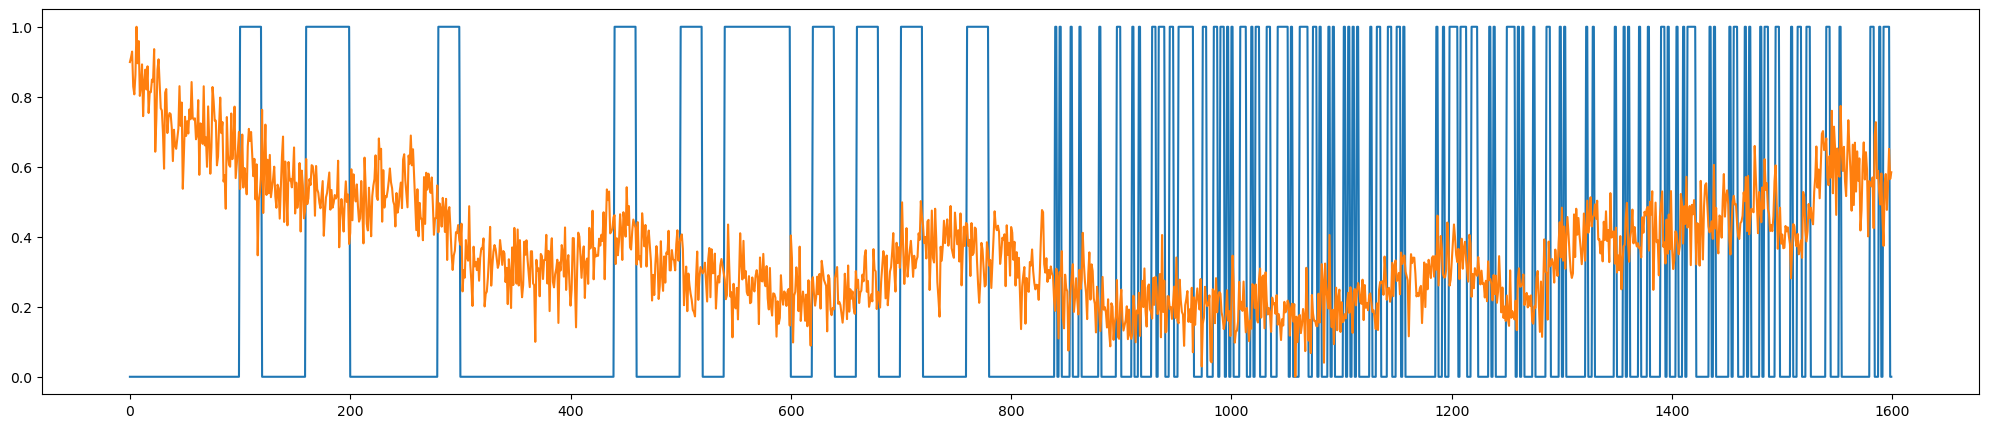

In [1060]:

fig, ax = plt.subplots(figsize=(25, 5))
ax.plot(stimulus['arr_6'])
ax.plot(range(1600), Y_full_df.iloc[947
                                    
                                    , : -2])

In [53]:
stimulus['arr_0'].reshape(-1).shape

(1600,)

In [1062]:
ON_ids = [22, 39, 47, 54, 57, 59, 90, 107, 134, 143, 180, 192, 200, 258, 270, 281, 306, 343, 406, 419, 434, 444, 487, 509, 554, 574, 576, 581, 643, 686, 695, 709, 710, 714, 719, 724, 762, 785, 789, 822, 825, 827, 888, 905, 916]
OFF_ids = [15, 38, 48, 81, 97, 98, 131, 154, 177, 188, 206, 249, 271, 301, 326, 400, 412, 417, 450, 495, 518, 531, 550, 682, 701, 783, 788, 806, 828, 875, 880]

In [1067]:
ON_cluster = Y_full_df.loc[ON_ids]  
OFF_cluster = Y_full_df.loc[OFF_ids]

In [1068]:
%store ON_cluster
%store OFF_cluster

,0,1,2,3,4,5,6,7,8,9,...,1592,1593,1594,1595,1596,1597,1598,1599,worm_id,stim_group
22,0.111328,0.113690,0.104047,0.097544,0.128698,0.096889,0.113149,0.091761,0.110592,0.098088,...,0.094158,0.087761,0.072876,0.105107,0.077777,0.120296,0.086403,0.073250,0,0
39,0.111844,0.125500,0.085508,0.112997,0.101238,0.122276,0.166369,0.147508,0.098558,0.156589,...,0.090089,0.147703,0.164014,0.274072,0.282609,0.370823,0.395895,0.326826,0,0
47,0.192604,0.220196,0.185329,0.198972,0.199652,0.214086,0.204000,0.212617,0.200606,0.209405,...,0.117549,0.125827,0.116286,0.147985,0.199686,0.212018,0.182312,0.149742,0,0
54,0.123674,0.123468,0.094402,0.088443,0.088383,0.105112,0.108088,0.097864,0.118637,0.101049,...,0.069045,0.070331,0.098578,0.078554,0.111078,0.113384,0.065145,0.054949,0,0
57,0.999277,0.966674,1.000000,0.947146,0.234203,0.886421,0.281143,0.251201,0.157087,0.222240,...,0.054529,0.148310,0.246808,0.267268,0.320307,0.321483,0.281932,0.206321,0,0
59,0.257971,0.260115,0.268479,0.246232,0.266098,0.242562,0.261012,0.225937,0.200361,0.212038,...,0.046181,0.052980,0.051662,0.082144,0.056758,0.079711,0.104782,0.041585,0,0
90,0.113358,0.145652,0.110831,0.103521,0.083500,0.087598,0.106528,0.126235,0.104085,0.136004,...,0.075667,0.066197,0.059868,0.049471,0.097512,0.099438,0.067180,0.065756,0,0
107,0.031882,0.000000,0.056720,0.044798,0.021835,0.004317,0.000000,0.000000,0.045460,0.015600,...,0.450036,0.273016,0.323943,0.431077,0.447732,0.526972,0.523080,0.547556,0,0
134,0.077771,0.050388,0.038936,0.063386,0.057993,0.087070,0.068161,0.045648,0.060495,0.052107,...,0.074979,0.084153,0.108473,0.132419,0.153624,0.178262,0.162290,0.148391,1,0
143,0.067608,0.076400,0.083592,0.069296,0.086243,0.072263,0.073743,0.054932,0.059659,0.081850,...,0.095291,0.106757,0.142643,0.171139,0.212862,0.268534,0.178100,0.120161,1,0


In [1069]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/ON_cluster.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
ON_cluster.to_csv(file_path, index=True)

In [1070]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/OFF_cluster.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
OFF_cluster.to_csv(file_path, index=True)

In [76]:
co = []
for i in range(0, worm_filter0.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(stimulus['arr_0'].reshape(-1), worm_filter0.iloc[i, : -2])
    co.append((i, corr))

In [73]:
co = np.array(co)
ON_0 = np.where(co[:, 1] >= 0.7)

In [77]:
co

[(0, 0.12198360360258045),
 (1, -0.21930742284386612),
 (2, -0.14804053492793867),
 (3, 0.19353614567558375),
 (4, -0.038982172948800846),
 (5, 0.1290321606463214),
 (6, -0.09609910119427925),
 (7, -0.1251105695087944),
 (8, 0.15575730750879466),
 (9, 0.1949665331659851),
 (10, -0.10134702456863501),
 (11, -0.0037308507023735248),
 (12, 0.015117999296221865),
 (13, 0.02881317238686722),
 (14, -0.22181490716104493),
 (15, -0.4771071019135782),
 (16, 0.15302649991057735),
 (17, -0.22276809138520617),
 (18, -0.12321650423770455),
 (19, -0.13632182314730157),
 (20, -0.06858674414050822),
 (21, -0.13470266573776063),
 (22, 0.5251575276244772),
 (23, -0.15536849197118163),
 (24, -0.18739701309706455),
 (25, 0.12102891149764777),
 (26, -0.043998116450547575),
 (27, 0.1259167719476845),
 (28, -0.1304896581061984),
 (29, 0.10591381887355741),
 (30, -0.01519521988436337),
 (31, 0.07692453157726495),
 (32, -0.16009549780132146),
 (33, 0.07115526545251012),
 (34, 0.03918428612654447),
 (35, 0.0434

In [74]:
ON_0

(array([], dtype=int64),)

In [43]:
index_array

array([ 92, 141, 143, 157, 166, 169, 174, 185, 192, 194, 209, 214, 232,
       248, 256, 258, 262, 273, 275, 276, 286, 292, 302, 312, 313, 316,
       323, 333, 339, 340, 343, 356, 369, 375, 406, 444, 445, 449, 454,
       460, 487, 580, 588, 598, 617, 625, 633, 636, 643, 758, 899])

In [ ]:
worm_filter0

In [ ]:
yanno_full_df

In [ ]:
co = []
for i in range(0, worm_filter0.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[0, :], worm_filter0.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_0 = np.where(co[:, 1] >= 0.7)

In [ ]:
AVA_0

In [ ]:

co = []
for i in range(0, worm_filter0.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[1, :], worm_filter0.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_0 = np.where(co[:, 1] >= 0.7)

In [ ]:
RME_0

In [ ]:
co = []
for i in range(0, worm_filter0.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[2, :], worm_filter0.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMVD_0 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMVD_0

In [ ]:
co = []
for i in range(0, worm_filter0.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[3, :], worm_filter0.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_0 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDD_0

In [ ]:
RME_0_df = worm_filter0.loc[RME_0]


In [ ]:
AVA_0_df = worm_filter0.loc[AVA_0]
SMDD_0_df = worm_filter0.loc[SMDD_0]
SMVD_0_df = worm_filter0.loc[SMVD_0]

In [ ]:
%store AVA_0_df 
%store RME_0_df
%store SMDD_0_df
%store SMVD_0_df

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_0_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_0_df.to_csv(file_path, index=True)


In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_0_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_0_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_0_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_0_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMVD_0_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMVD_0_df.to_csv(file_path, index=True)

## Worm1


In [ ]:
co = []
for i in range(0, worm_filter1.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[4, :], worm_filter1.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_1 = np.where(co[:, 1] >= 0.7)

In [ ]:
AVA_1

In [ ]:
co = []
for i in range(0, worm_filter1.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[5, :], worm_filter1.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_1 = np.where(co[:, 1] >= 0.7)

In [ ]:
RME_1

In [ ]:
co = []
for i in range(0, worm_filter1.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[6, :], worm_filter1.iloc[i, : -2])
    co.append((i, corr))


In [ ]:
co = np.array(co)
SMDV_1 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDV_1

In [ ]:
co = []
for i in range(0, worm_filter1.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[7, :], worm_filter1.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_1 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDD_1

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter1

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter1.index

# Step 2: Drop the first column from the original position
worm_filter1 = worm_filter1.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter1['Global Cell IDs'] = global_cell_ids


In [ ]:
AVA_1_df = worm_filter1.loc[AVA_1]
RME_1_df = worm_filter1.loc[RME_1]
SMDV_1_df = worm_filter1.loc[SMDV_1]
SMDD_1_df = worm_filter1.loc[SMDD_1]


In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_1_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_1_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_1_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_1_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_1_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_1_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_1_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_1_df.to_csv(file_path, index=True)

### Worm2

In [ ]:
co = []
for i in range(0, worm_filter2.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[8, :], worm_filter2.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_2 = np.where(co[:, 1] >= 0.7)

In [ ]:
AVA_2

In [ ]:
co = []
for i in range(0, worm_filter2.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[9, :], worm_filter2.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_2 = np.where(co[:, 1] >= 0.7)

In [ ]:
RME_2

In [ ]:
co = []
for i in range(0, worm_filter2.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[10, :], worm_filter2.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_2 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDD_2 

In [ ]:
co = []
for i in range(0, worm_filter2.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[11, :], worm_filter2.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDV_2 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDV_2

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter2

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter2.index

# Step 2: Drop the first column from the original position
worm_filter2 = worm_filter2.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter2['Global Cell IDs'] = global_cell_ids

In [ ]:
AVA_2_df = worm_filter2.loc[AVA_2]
RME_2_df = worm_filter2.loc[RME_2]
SMDV_2_df = worm_filter2.loc[SMDV_2]
SMDD_2_df = worm_filter2.loc[SMDD_2]

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_2_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_2_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_2_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_2_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_2_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_2_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_2_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_2_df.to_csv(file_path, index=True)

## WORM3

In [ ]:
co = []
for i in range(0, worm_filter3.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[12, :], worm_filter3.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_3 = np.where(co[:, 1] >= 0.7)

In [ ]:
AVA_3

In [ ]:
co = []
for i in range(0, worm_filter3.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[13, :], worm_filter3.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_3 = np.where(co[:, 1] >= 0.7)

In [ ]:
RME_3

In [ ]:
co = []
for i in range(0, worm_filter3.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[14, :], worm_filter3.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_3 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDD_3

In [ ]:
co = []
for i in range(0, worm_filter3.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[15, :], worm_filter3.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDV_3 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDV_3

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter3

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter3.index

# Step 2: Drop the first column from the original position
worm_filter3 = worm_filter3.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter3['Global Cell IDs'] = global_cell_ids

In [ ]:
AVA_3_df = worm_filter3.loc[AVA_3]
RME_3_df = worm_filter3.loc[RME_3]
SMDV_3_df = worm_filter3.loc[SMDV_3]
SMDD_3_df = worm_filter3.loc[SMDD_3]

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_3_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_3_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_3_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_3_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_3_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_3_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_3_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_3_df.to_csv(file_path, index=True)

## WORM4

In [ ]:
co = []
for i in range(0, worm_filter4.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[16, :], worm_filter4.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_4 = np.where(co[:, 1] >= 0.7)

In [ ]:
AVA_4

In [ ]:
co = []
for i in range(0, worm_filter4.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[17, :], worm_filter4.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_4 = np.where(co[:, 1] >= 0.7)

In [ ]:
RME_4

In [ ]:
co = []
for i in range(0, worm_filter4.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[18, :], worm_filter4.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDV_4 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDV_4

In [ ]:
co = []
for i in range(0, worm_filter4.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[19, :], worm_filter4.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_4 = np.where(co[:, 1] >= 0.7)

In [ ]:
SMDD_4

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter4

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter4.index

# Step 2: Drop the first column from the original position
worm_filter4 = worm_filter4.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter4['Global Cell IDs'] = global_cell_ids

In [ ]:
AVA_4_df = worm_filter4.loc[AVA_4]
RME_4_df = worm_filter4.loc[RME_4]
SMDV_4_df = worm_filter4.loc[SMDV_4]
SMDD_4_df = worm_filter4.loc[SMDD_4]

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_4_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_4_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_4_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_4_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_4_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_4_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_4_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_4_df.to_csv(file_path, index=True)

## Worm 5

In [ ]:
co = []
for i in range(0, worm_filter5.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[20, :], worm_filter5.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_5 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter5.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[21, :], worm_filter5.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_5 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter5.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[22, :], worm_filter5.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDV_5 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter5.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[23, :], worm_filter5.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_5 = np.where(co[:, 1] >= 0.7)

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter5

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter5.index

# Step 2: Drop the first column from the original position
worm_filter5 = worm_filter5.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter5['Global Cell IDs'] = global_cell_ids

In [ ]:
AVA_5_df = worm_filter5.loc[AVA_5]
RME_5_df = worm_filter5.loc[RME_5]
SMDV_5_df = worm_filter5.loc[SMDV_5]
SMDD_5_df = worm_filter5.loc[SMDD_5]

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_5_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_5_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_5_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_5_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_5_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_5_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_5_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_5_df.to_csv(file_path, index=True)

## Worm 6

In [ ]:
co = []
for i in range(0, worm_filter6.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[24, :], worm_filter6.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
AVA_6 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter6.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[25, :], worm_filter6.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
RME_6 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter6.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[26, :], worm_filter6.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDV_6 = np.where(co[:, 1] >= 0.7)

In [ ]:
co = []
for i in range(0, worm_filter6.shape[0]):  # Start from the first row
    # Calculate Pearson correlation coefficient between the first row and the ith row
    corr, _ = pearsonr(yanno_full_df.iloc[27, :], worm_filter6.iloc[i, : -2])
    co.append((i, corr))

In [ ]:
co = np.array(co)
SMDD_6 = np.where(co[:, 1] >= 0.7)

In [ ]:
#move worm1 global idx to a new column, and give it standard index
worm_filter6

# Step 1: Extract the first column and save it
global_cell_ids = worm_filter6.index

# Step 2: Drop the first column from the original position
worm_filter6 = worm_filter6.reset_index(drop=True)

# Step 3: Append it to the end of the DataFrame
worm_filter6['Global Cell IDs'] = global_cell_ids

In [ ]:
AVA_6_df = worm_filter6.loc[AVA_6]
RME_6_df = worm_filter6.loc[RME_6]
SMDV_6_df = worm_filter6.loc[SMDV_6]
SMDD_6_df = worm_filter6.loc[SMDD_6]

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/AVA_6_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
AVA_6_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/RME_6_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
RME_6_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDV_6_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDV_6_df.to_csv(file_path, index=True)

In [ ]:
file_path = '/Users/iuliarusu/Documents/Sharpee/Clustering/clustered_bacterial_stim/SMDD_6_df.csv'  # Change the path as needed

# Save DataFrame to CSV, save index as seperate column
SMDD_6_df.to_csv(file_path, index=True)